In [143]:
%matplotlib inline
import numpy as np
import pandas as pd
import glob
import json
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('dummy.csv') #contains AROM_PRE_A_L_EL_EXT_1337 and AROM_PRE_A_L_SH_ER_1337
df.set_index(['File','Frame #'],inplace=True)

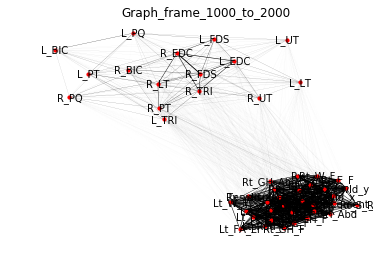

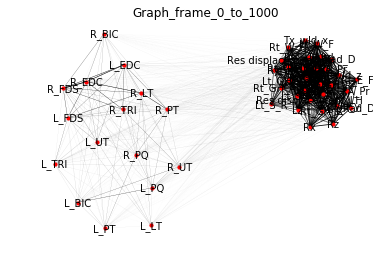

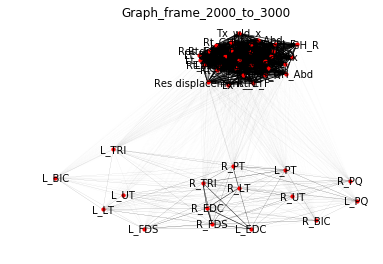

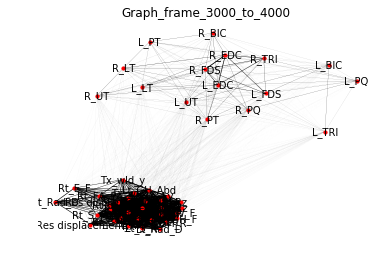

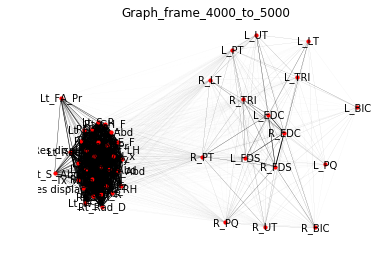

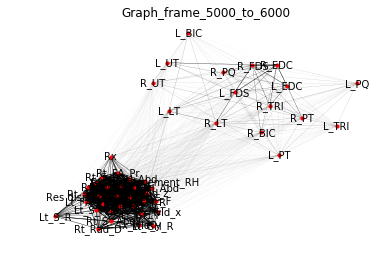

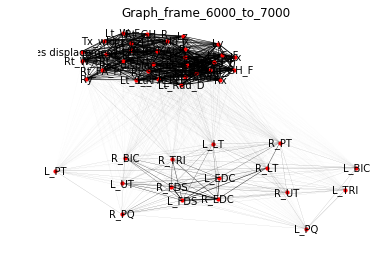

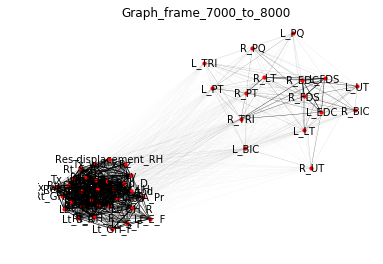

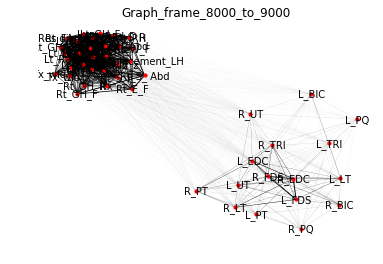

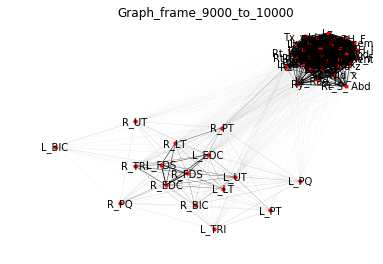

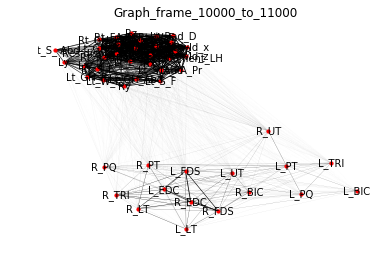

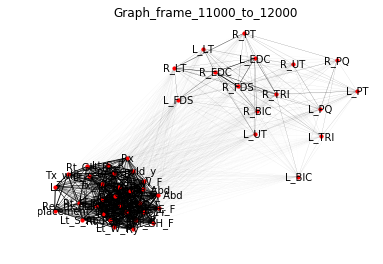

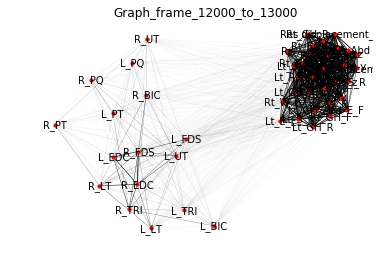

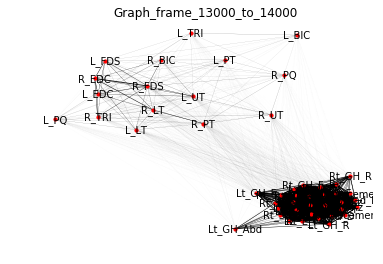

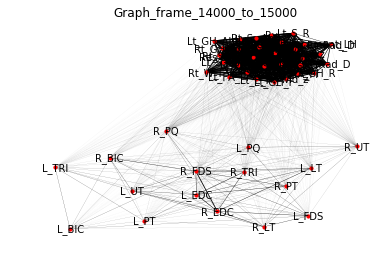

In [185]:
#Constructing graphs based on binned windows
window_size=1000
_df=df.loc['AROM_PRE_A_L_EL_EXT_1337']
_df=_df.groupby(_df.index // window_size,as_index=False).corr()

frames=_df.index.get_level_values(level=0).unique()
columns=_df.columns
i=0
plt.clf()
for frame in frames:
    g=nx.from_numpy_matrix(np.abs(_df.loc[frame].values))
    sg=[]
    SG=nx.Graph()
    for n,attrdict in g.edges.items():
        if n[0]!=n[1]:
            if not np.isnan(attrdict['weight']):
                sg.append((columns[n[0]],columns[n[1]],attrdict['weight']))
#             else:
#                 sg.append((columns[n[0]],columns[n[1]],0))
    SG.add_weighted_edges_from(sg)
    pos = nx.spring_layout(SG)
    plt.figure(i) 
    plt.title('Graph_frame_'+str(i*window_size)+'_to_'+str((i+1)*window_size))
    weights = [SG[u][v]['weight'] for u,v in SG.edges()]
    nx.draw(SG,pos,node_size=10,width=weights)
    nx.draw_networkx_labels(SG,pos=pos,font_size=10)
    i+=1
    #plt.savefig("Graph"+str(frame)+".png", format="PNG")

In [13]:
# rolliung windows
window_size=10
test=_df['R_UT'].rolling(window=10).corr(_df['R_LT'])
_df=df.loc['AROM_PRE_A_L_EL_EXT_1337'][df.columns[-10:]]
test=_df.rolling(10).corr(pairwise=True).loc[10:]